In [1]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from descartes import PolygonPatch
import pylab as pl
import pandas as pd
import os

In [ ]:
os.chdir('C:/Users/zacha/Documents/GitHub/plymouth-university-proj518')
print(os.getcwd())

In [2]:
aoi_boundary_HARV = gpd.read_file(
  "data/AIS_Grid_2015_MMO/AIS_Grid_2015_MMO.shp")


In [3]:
aoi_boundary_HARV

,OBJECTID,CELL_ID,Avg_STG_0,Avg_STG_1,Avg_STG_2,Avg_STG_3,Avg_STG_4,Avg_STG_5,Avg_STG_6,Avg_STG_7,Avg_STG_8,Avg_STG_9,Avg_STG_10,Avg_Total_,Weekly_Avg,Yearly_Avg,Shape_Leng,Shape_Area,geometry
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.083333,4.333333,8000.0,4000000.0,"POLYGON ((-9.92277 47.57501, -9.92514 47.59287..."
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.083333,0.083333,4.333333,8000.0,4000000.0,"POLYGON ((-9.89637 47.57661, -9.89873 47.59447..."
2,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((-9.86997 47.57820, -9.87232 47.59606..."
3,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((-9.84356 47.57978, -9.84590 47.59765..."
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((-9.81715 47.58136, -9.81949 47.59923..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417905,417906,417906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((6.96897 61.60176, 6.97471 61.61944, ..."
417906,417907,417907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((7.00609 61.59902, 7.01186 61.61670, ..."
417907,417908,417908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((7.04320 61.59627, 7.04899 61.61395, ..."
417908,417909,417909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8000.0,4000000.0,"POLYGON ((7.08031 61.59351, 7.08611 61.61119, ..."


In [4]:
aoi_boundary_HARV.crs


<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
lat_range = (53.486257927, 54.1)
lon_range = (0.5, 2.5571098)

In [12]:
df = pd.DataFrame(columns=['polygon', 'yearly_avg'])


for i, f in aoi_boundary_HARV.iterrows():
    points = f["geometry"]
    x, y = points.exterior.coords.xy

    x = np.array([lon for lon in x])
    y = np.array([lat for lat in y])

    # check if any x or y is outside of the range
    if any(x < lon_range[0]) or any(x > lon_range[1]) or any(y < lat_range[0]) or any(y > lat_range[1]):
        continue
    else:
        pairs = list(zip(x, y))

        # append pairs and yearly_avg to df
        df.loc[len(df)] = [pairs, f['Yearly_Avg']]

In [13]:
df

,polygon,yearly_avg
0,"[(0.5195056276354217, 53.488062072925935), (0....",4095.000000
1,"[(0.5495905883453761, 53.48717128944183), (0.5...",3553.333332
2,"[(0.5209936641826822, 53.50600547641557), (0.5...",2188.333333
3,"[(0.5510912798026862, 53.50511411293181), (0.5...",2261.999997
4,"[(0.5811872794308233, 53.50421518265062), (0.5...",1642.333333
...,...,...
2207,"[(2.433981256590498, 54.06421455374561), (2.43...",294.666667
2208,"[(2.4644008640922856, 54.062832427891244), (2....",238.333334
2209,"[(2.494817912755435, 54.061442634232094), (2.4...",190.666667
2210,"[(2.466758176631575, 54.08072625710094), (2.46...",225.333333


In [14]:
# save df
df.to_csv('data/UK east coast shipping density 2015.csv')

In [15]:
# create a greyscale colormap
# get min and max of color
minc, maxc = df['yearly_avg'].min(), df['yearly_avg'].max()

print(minc, maxc)

# calculate steps between min and max
diff = (maxc - minc)

47.66666667 5052.666667


c:\Users\zacha\miniconda3\envs\geo\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


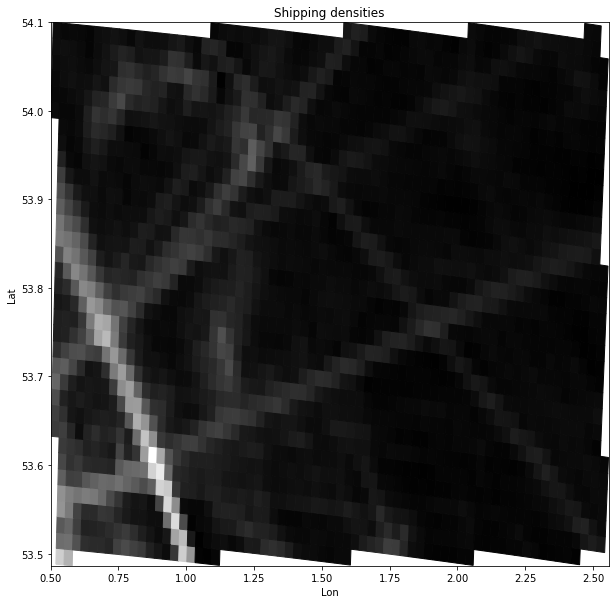

In [17]:
# plot contrained to search space
fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title("Shipping densities")

for idx, row in df.iterrows():
    polygon = Polygon(row['polygon'])

    # get percentage colours[idx] is between min and max
    i = (row['yearly_avg'] - minc) / diff
    rgb = (int(255 * i), int(255 * i), int(255 * i))
    html = "#%02x%02x%02x" % rgb

    patch = PolygonPatch(polygon, fc=html, ec=html, fill=True)
    ax.add_patch(patch)

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# set axis limits to viable area
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

pl.show()